In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
cities = pd.read_csv("cities.csv")
product = pd.read_csv("product.csv")
sales = pd.read_csv("sales.csv", index_col=0, delimiter = ",")

In [4]:
sales

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,NaN,NaN
3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,NaN,NaN
4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,NaN,NaN
5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886054,S0143,P0676,2019-10-31,NaN,NaN,NaN,19.90,PR03,verylow,PR03,NaN,NaN,NaN
8886055,S0143,P0680,2019-10-31,NaN,NaN,NaN,139.90,PR14,NaN,PR03,NaN,NaN,NaN
8886056,S0143,P0694,2019-10-31,NaN,NaN,NaN,7.50,PR14,NaN,PR03,NaN,NaN,NaN
8886057,S0143,P0718,2019-10-31,NaN,NaN,NaN,23.75,PR14,NaN,PR03,NaN,NaN,NaN


In [5]:
sales['date'] = pd.to_datetime(sales['date'])
sales_grouped = sales.set_index('date').groupby('store_id')["sales","revenue"].resample("W").sum()
sales_grouped = sales_grouped.reset_index()
sales_grouped

,store_id,date,sales,revenue
0,S0002,2017-01-08,750.232,1813.24
1,S0002,2017-01-15,871.530,1896.91
2,S0002,2017-01-22,1069.555,7404.16
3,S0002,2017-01-29,910.255,2078.39
4,S0002,2017-02-05,732.754,1745.47
...,...,...,...,...
8605,S0143,2019-10-06,18.000,80.82
8606,S0143,2019-10-13,0.000,0.00
8607,S0143,2019-10-20,0.000,0.00
8608,S0143,2019-10-27,0.000,0.00


In [6]:
sales_grouped_v2 = sales_grouped.set_index("date")

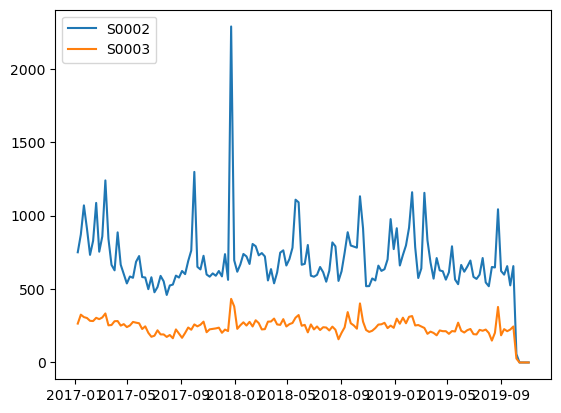

In [8]:
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0002"].loc[:,"sales"], label = "S0002")
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0003"].loc[:,"sales"], label = "S0003")
plt.legend(loc="upper left")
plt.show()

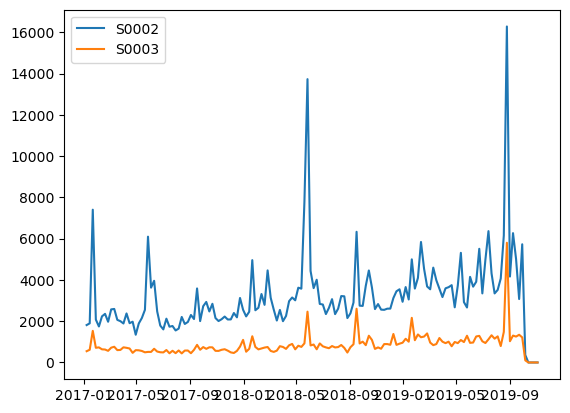

In [9]:
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0002"].loc[:,"revenue"], label = "S0002")
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0003"].loc[:,"revenue"], label = "S0003")
plt.legend(loc="upper left")
plt.show()

In [7]:
# Subsetting the dataset: 3 months for test
train = sales_grouped_v2['2017-01-08' :'2019-06-30']
test = sales_grouped_v2['2019-06-30' :'2019-10-06']

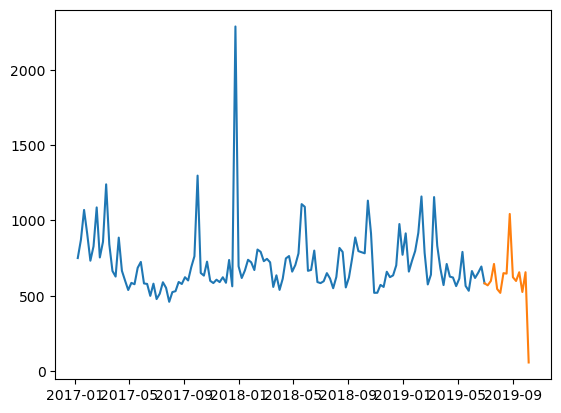

In [11]:
plt.plot(train[train["store_id"] == "S0002"].loc[:,"sales"], label = "Train")
plt.plot(test[test["store_id"] == "S0002"].loc[:,"sales"],label = "Test")
plt.show()

In [8]:
# Simple average
avg = test.copy().reset_index()
mean_sales = train.groupby(["store_id"])["sales"].mean().reset_index()
mean_revenue = train.groupby(["store_id"])["revenue"].mean().reset_index()

In [9]:
for i in range(len(avg)):
    for j in range(len(mean_sales)):
        if avg.loc[i, "store_id"] == mean_sales.loc[j, "store_id"]:
            avg.loc[i, 'avg_forecast_sales'] = mean_sales.loc[j, "sales"]

for i in range(len(avg)):
    for j in range(len(mean_revenue)):
        if avg.loc[i, "store_id"] == mean_revenue.loc[j, "store_id"]:
            avg.loc[i, 'avg_forecast_revenue'] = mean_revenue.loc[j, "revenue"]

avg = avg.set_index("date")

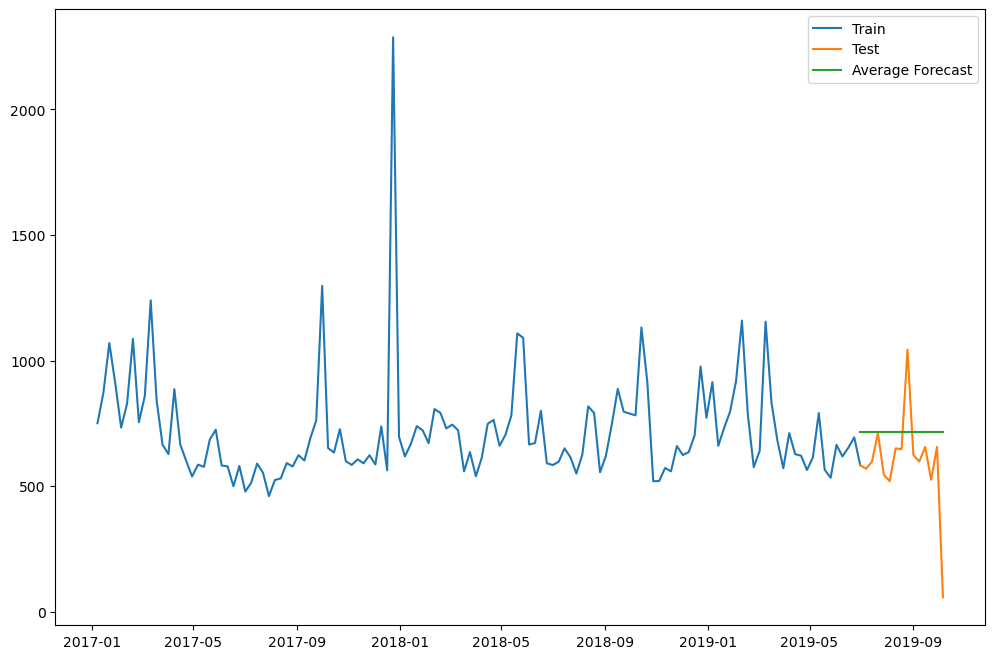

In [14]:
plt.figure(figsize=(12,8))
plt.plot(train[train["store_id"] == "S0002"].loc[:,"sales"], label='Train')
plt.plot(test[test["store_id"] == "S0002"].loc[:,"sales"], label='Test')
plt.plot(avg[avg["store_id"] == "S0002"].loc[:,"avg_forecast_sales"], label='Average Forecast')
plt.legend(loc='best')
plt.show()

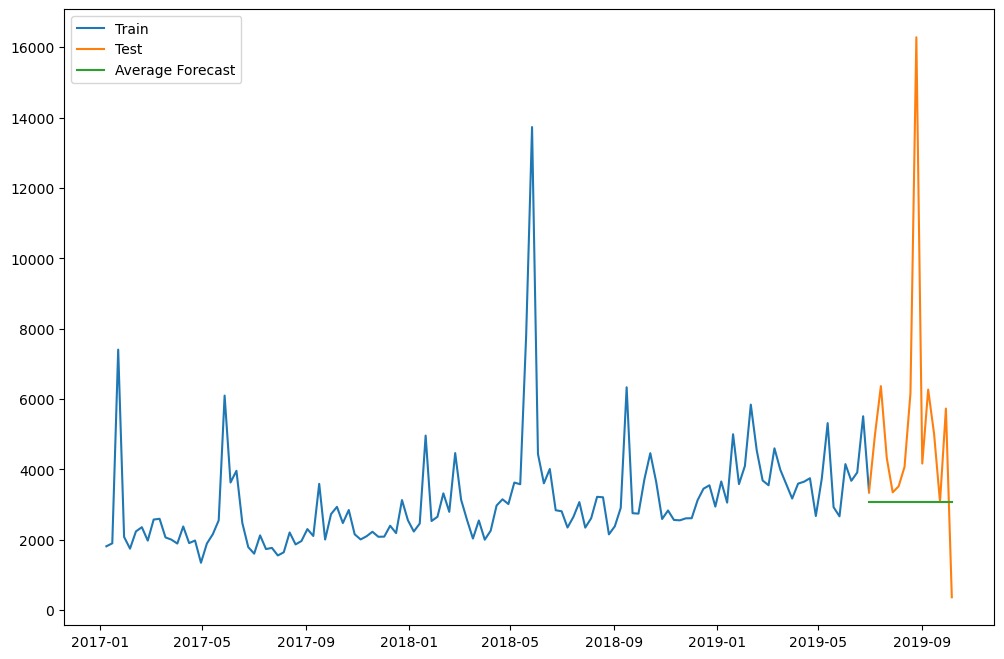

In [15]:
plt.figure(figsize=(12,8))
plt.plot(train[train["store_id"] == "S0002"].loc[:,"revenue"], label='Train')
plt.plot(test[test["store_id"] == "S0002"].loc[:,"revenue"], label='Test')
plt.plot(avg[avg["store_id"] == "S0002"].loc[:,"avg_forecast_revenue"], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_sales = sqrt(mean_squared_error(test["sales"], avg.avg_forecast_sales))
rmse_revenue = sqrt(mean_squared_error(test["sales"], avg.avg_forecast_revenue))
print(rmse_sales, rmse_revenue)

256.5496701588549 2848.772125475085


In [ ]:
# AUTO-ARIMA - use daily or weekly
%pip install pmdarima
from pmdarima.arima import ADFTest
from pmdarima import auto_arima

In [18]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_grouped["sales"])

(0.01, False)

In [12]:
# Get unique store IDs
store_ids = train['store_id'].unique()
store_ids

array(['S0002', 'S0003', 'S0005', 'S0007', 'S0010', 'S0012', 'S0014',
       'S0015', 'S0016', 'S0020', 'S0022', 'S0023', 'S0026', 'S0030',
       'S0032', 'S0036', 'S0038', 'S0039', 'S0040', 'S0041', 'S0045',
       'S0046', 'S0050', 'S0052', 'S0055', 'S0056', 'S0058', 'S0059',
       'S0061', 'S0062', 'S0067', 'S0068', 'S0071', 'S0072', 'S0073',
       'S0076', 'S0077', 'S0080', 'S0083', 'S0085', 'S0086', 'S0088',
       'S0089', 'S0091', 'S0092', 'S0094', 'S0095', 'S0097', 'S0099',
       'S0102', 'S0104', 'S0107', 'S0108', 'S0109', 'S0120', 'S0122',
       'S0126', 'S0131', 'S0132', 'S0136', 'S0141', 'S0142', 'S0143'],
      dtype=object)

In [107]:
# Apply auto_arima for each store ID without seasonal component 

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_sales', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_grouped_v2[sales_grouped_v2['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)

    # Apply auto_arima for the specific store
    model = auto_arima(df_store["sales"], start_p=1, start_q=1, test='adf',max_p=5, max_q=5, 
                       m=1, d=1, seasonal=False,start_P=0, D=None, trace=True, error_action='ignore', 
                       suppress_warnings=True, stepwise=True, random_state=20)

    # Train the model 
    model.fit(df_train_store["sales"])
    
    #Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods = len(df_test_store)), columns = ["predicted_sales"])
    prediction_store["store_id"] = store_id
    prediction_store.index = df_test_store.index
    
    prediction = prediction.append(prediction_store)

df_test["arima"] = prediction["predicted_sales"]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2008.514, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2056.226, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2033.046, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2009.066, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2054.283, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2010.440, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2010.079, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2008.746, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2022.844, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2007.805, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2008.003, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2031.185, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2009.766, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [100]:
df_test

,store_id,sales,revenue,arima
2019-06-30,S0002,583.0,3347.68,NaN
2019-07-07,S0002,569.0,4983.80,NaN
2019-07-14,S0002,598.0,6365.78,NaN
2019-07-21,S0002,711.0,4318.66,NaN
2019-07-28,S0002,545.0,3346.71,NaN
...,...,...,...,...
2019-09-08,S0143,104.0,915.27,NaN
2019-09-15,S0143,63.0,507.08,NaN
2019-09-22,S0143,89.0,601.63,NaN
2019-09-29,S0143,147.0,704.87,NaN


In [108]:
df_test["arima"] = prediction["predicted_sales"]
df_test[df_test["store_id"] == "S0002"]

,store_id,sales,revenue,arima
2019-06-30,S0002,583.00,3347.68,686.212452
2019-07-07,S0002,569.00,4983.80,709.546549
2019-07-14,S0002,598.00,6365.78,714.821883
2019-07-21,S0002,711.00,4318.66,716.014521
2019-07-28,S0002,545.00,3346.71,716.284151
2019-08-04,S0002,519.00,3516.66,716.345108
2019-08-11,S0002,650.00,4068.51,716.358889
2019-08-18,S0002,647.00,6158.68,716.362005
2019-08-25,S0002,1043.00,16283.63,716.362709
2019-09-01,S0002,623.00,4164.56,716.362869


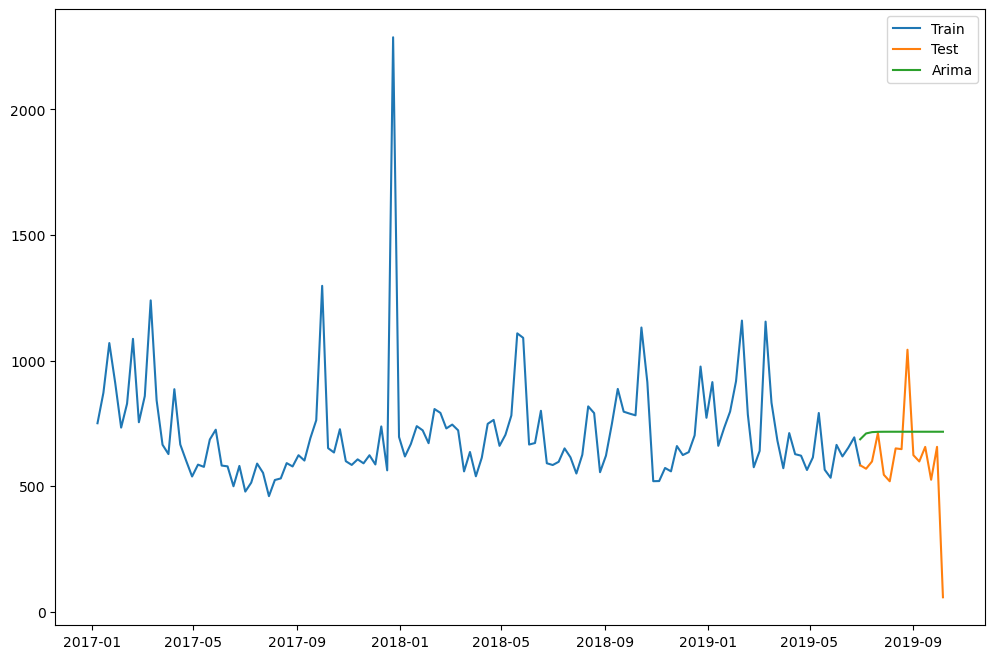

In [109]:
plt.figure(figsize=(12,8))
plt.plot(df_train[df_train["store_id"] == "S0002"].loc[:,"sales"], label='Train')
plt.plot(df_test[df_test["store_id"] == "S0002"].loc[:,"sales"], label='Test')
plt.plot(df_test[df_test["store_id"] == "S0002"].loc[:,"arima"], label='Arima')
#plt.plot(avg[avg["store_id"] == "S0002"].loc[:,"avg_forecast_sales"], label='Average Forecast')
plt.legend(loc='best')
plt.show()